In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

matplot library 的 pyplot是python的类似matlab plot的工具，for example:
x

```
# 此内容为代码格式
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
# 0-5之间间隔为0.1
y = np.sin(x)
plt.plot(x,y)
```

In [34]:
print (tf.__version__)

2.2.0-rc3


In [0]:
# import the Fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

train_images.shape -> (60000,28,28) 

train_labels.shape -> (60000,)
each label is an integer between 0-9, which is familar to MNIST handwritting.


In [0]:
# define the class names. The names are known from the dataset 

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',  'Shirt',   'Sneaker',  'Bag',   'Ankle boot'] 

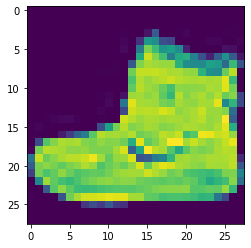

In [37]:
# have a inspect of the data. (application of the plt)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar
plt.grid(False) #grid 控制格子，一开始认为是grey。。。
plt.show()

In [0]:
# Scale the values in images to between 0-1 (To get rid of the disturbing influence of gradient exploding)
# To divide 255 is because the images are in bit-16 color, 2^16 = 256

train_images = train_images / 255.0
test_images = test_images / 255.0

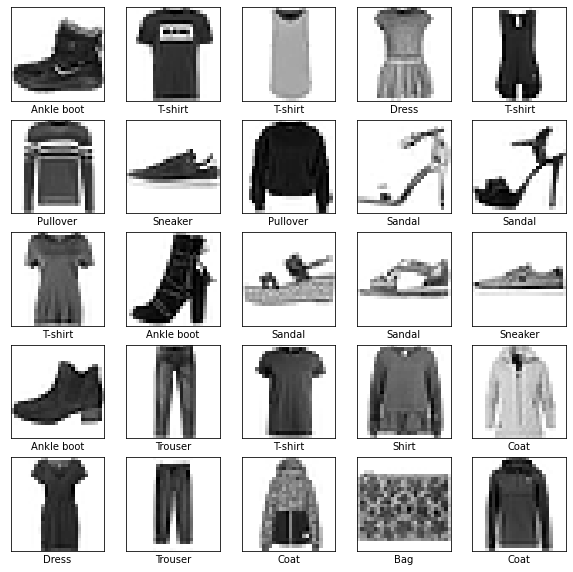

In [39]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)  # subplot(nrows, ncols, index, **kwargs)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)
])

Explanation about Sequential:

Flatten 将input_shape 为 28*28 的数据扁平成（28*28，1）。
这个操作在我matlab实现的三层神经网络也如此实现。在全连接MLP中，没有卷积操作必须将数据改为vector。
Dense 就是fully connected layer

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



# Compiling the model:
Before the model is ready to be trained, it needs a few more settings.

1.   Loss function: 损失函数, 采用了交叉熵损失.
Using from_logits=True may be more numerically stable.是否进行逻辑回归。
2.   Optimizer: how the model is updated based on the data it sees and its loss function. In here we used Adam.
3.   Metrics: Used to monitor (supervise) the training and testing steps.


In [42]:
# Train the model
# model.fit: Trains the model for a fixed number of epochs (iterations on a dataset).

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5017 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

从上述训练Epoch的例子可以看出：
训练过程是在上一次Epoch的基础上继续的。每一个Epoch都对training set遍历一遍。

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3356 - accuracy: 0.8844


# So？训练结束了，如果利用已经训练好的模型进行新数据的预测？

In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


# then if we get a new test set, we can define it as test_images. new test_images have no labels.

predictions = probability_model.predict(test_images)

In [46]:
predictions.shape

(10000, 10)

In [52]:
predictions[0]

array([3.4378383e-10, 1.5154617e-11, 9.1077500e-11, 1.7414568e-11,
       5.9535103e-12, 5.8498216e-04, 6.3549827e-08, 5.7767832e-04,
       1.5139148e-07, 9.9883717e-01], dtype=float32)

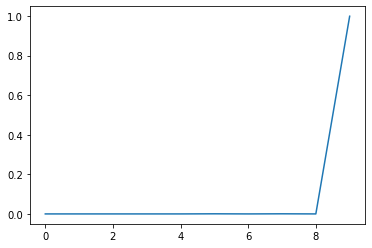

In [53]:
x = np.arange (0,10,1)
y = predictions[0]
plt.plot(x,y)